# Lab 4: Comparing Lumpsum and Dollar-Cost Averaging (DCA)

## Objective
In this lab, you will learn to compare two investment strategies: 
1. Lumpsum 
2. Dollar-Cost Averaging (DCA). 

You will use historical market data to analyze the performance of these strategies.

**Lump Sum** investment involves putting a large amount of money into an investment all at once. 
- The idea is to take advantage of potential market growth immediately, allowing the entire amount to benefit from any market uptrend.
- While it can lead to higher returns when markets are rising, it also carries a higher risk of loss if the market declines shortly after the investment.

**Dollar Cost Averaging (DCA)** is an investment strategy where a fixed amount of money is invested at regular intervals, regardless of the asset's price. 
- This approach aims to reduce the impact of market volatility by buying more shares when prices are low and fewer shares when prices are high, leading to a potentially lower average cost per share over time.
- It’s a strategy often used to minimize risk and manage emotional reactions to market fluctuations.

## Steps
Follow the steps below to complete the experiment:

1. **Load and Inspect Data**
2. **Implement Lumpsum Strategy**
3. **Implement Dollar-Cost Averaging (DCA) Strategy**
4. **Compare the Performance of Both Strategies**

## Instructions
Execute each cell step by step and understand the code. Modify the code if necessary to explore further.


---


## Step 1: Load and Inspect Data

In this step, you will load the historical data for the S&P 500 ETF (SPY) using the `yfinance` library. You will then inspect the data to understand its structure.

Execute the following code to load and inspect the data.


In [5]:
import pandas as pd

In [6]:
# Load the SPY data and set the Date as the dataframe index.
spy = pd.read_csv("./spy.csv", index_col = "Date", parse_dates = True)
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-02,0.0,137.100006,134.610001,136.339996,136.339996,28870000
1981-01-05,0.0,139.240005,135.860001,137.970001,137.970001,58710000
1981-01-06,0.0,140.320007,135.779999,138.119995,138.119995,67400000
1981-01-07,0.0,136.020004,132.300003,135.080002,135.080002,92890000
1981-01-08,0.0,136.100006,131.960007,133.059998,133.059998,55350000


---

## Step 2: Implement Lumpsum Strategy

In this step, you will implement the Lumpsum investment strategy. 

### Instructions:
1. Assume you invest a fixed amount at the start date.
2. Calculate the value of the investment at the end date.

Here is a template to get you started:
1. Choose an initial investment amount (e.g., $10,000).
2. Determine the price of SPY on the start date and the end date.
3. Calculate the number of shares purchased and the value at the end date.


In [7]:
# Lumpsum Investment Strategy

# Define the initial investment amount, say $34500
Init = 34_500

# Get the price of SPY on the start date
start_price = spy["Close"].iloc[0]

# Calculate the number of shares purchased
shares = Init / start_price

# Get the price of SPY on the end date
end_price = spy["Close"].iloc[-1]

# Calculate the value of the investment at the end date
investment_value_Lumpsum = end_price * shares
Lumpsum_GL = investment_value_Lumpsum - Init
Lumpsum_return = (investment_value_Lumpsum - Init) / Init * 100

print(f"Lumpsum Investment Value: ${investment_value_Lumpsum:.2f}")
print(f"Investment Gain/Loss: ${Lumpsum_GL:.2f}")
print(f"Investment Return: {Lumpsum_return:.2f}%")

Lumpsum Investment Value: $1206052.67
Investment Gain/Loss: $1171552.67
Investment Return: 3395.80%


---

## Step 3: Implement Dollar-Cost Averaging (DCA) Strategy

In this step, you will implement the Dollar-Cost Averaging (DCA) investment strategy.

### Instructions:
1. Assume you invest a fixed amount at regular intervals (e.g., monthly).
2. Calculate the total number of shares purchased over the investment period.
3. Determine the value of the investment at the end date.

Here is a template to get you started:
1. Choose a regular investment amount and interval (e.g., $100 monthly).
2. Loop through the data to simulate regular investments (e.g., every 30 trading days).
3. Calculate the value of the total shares at the end date.


In [8]:
# Dollar-Cost Averaging (DCA) Investment Strategy

# Define the regular investment amount and interval (e.g., every 30 trading days)
investment_amount = 100
investment_interval = "1M"  # 1 month

# Initialize variables
total_shares = 0
dates = spy.index
counter = 0

# Loop through the data to simulate regular investments
for i in range(0, len(dates), 30):
    price = spy.iloc[i]["Close"]
    shares_bought = investment_amount / price
    total_shares += shares_bought
    counter += 1
    # print(f"Investment Time: {date}, Price: {price:.2f}, share bought: {shares_bought:.4f}")

# Get the price of SPY on the end date
end_price = spy["Close"].iloc[-1]

# Calculate the value of the investment at the end date
investment_value_DCA = end_price * total_shares
DCA_total_invested = counter * investment_amount
DCA_GL = investment_value_DCA - DCA_total_invested
DCA_return = (investment_value_DCA - DCA_total_invested) / DCA_total_invested * 100

print(f"DCA Investment Value: ${investment_value_DCA:.2f}")
print(f"Invest {counter} times")
print(f"Total invest amount: ${DCA_total_invested}")
print(f"Investment Gain/Loss: ${DCA_GL:.2f}")
print(f"Investment Return: {DCA_return:.2f}%")

DCA Investment Value: $331366.85
Invest 345 times
Total invest amount: $34500
Investment Gain/Loss: $296866.85
Investment Return: 860.48%


---

## Step 4: Compare the Performance of Both Strategies

In this final step, you will compare the performance of the Lumpsum and DCA strategies. 

### Instructions:
1. Review the calculated investment values for both strategies.
2. Discuss which strategy performed better and why.

Reflect on the advantages and disadvantages of each strategy and how market conditions might influence their performance.

You can use the data or visualization to support your explaination.


In [9]:
comparison = pd.DataFrame({
    "Index": ["Total invested", "Final value", "Investment Gain/Loss", "Investment Return", "Annulized Return (approx)"],
    "Lumpsum": [
        f"${Init:,.2f}",
        f"${investment_value_Lumpsum:,.2f}",
        f"${Lumpsum_GL:,.2f}",
        f"{Lumpsum_return:.2f}%",
        f"{(Lumpsum_return / 40):.2f}%"
    ],
    "DCA": [
        f"${DCA_total_invested:,.2f}",
        f"${investment_value_DCA:,.2f}",
        f"${DCA_GL:,.2f}",
        f"{DCA_return:.2f}%",
        f"{(DCA_return / 40):.2f}%"
    ]
})
print(comparison.to_string(index = False))

                    Index       Lumpsum         DCA
           Total invested    $34,500.00  $34,500.00
              Final value $1,206,052.67 $331,366.85
     Investment Gain/Loss $1,171,552.67 $296,866.85
        Investment Return      3395.80%     860.48%
Annulized Return (approx)        84.90%      21.51%


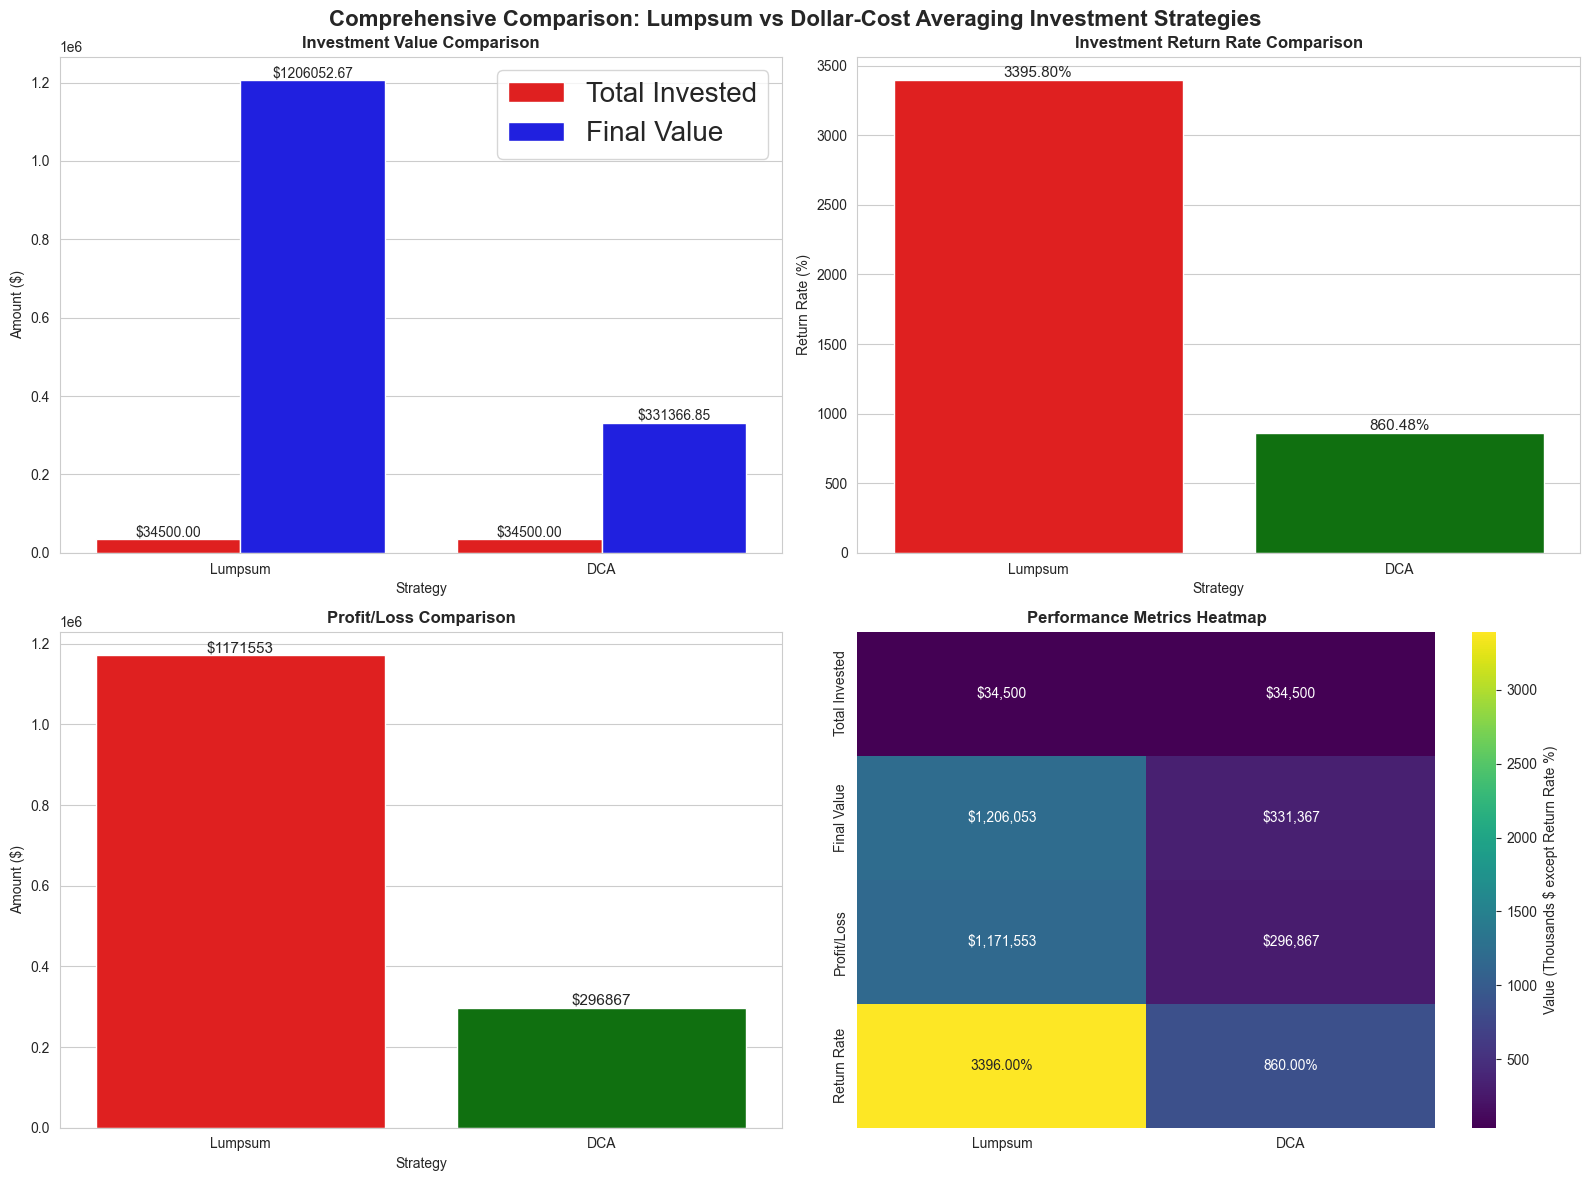

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['axes.unicode_minus'] = False

comparison_df = pd.DataFrame({
    'Metric': ['Total Invested', 'Final Value', 'Profit/Loss', 'Return Rate'] * 2,
    'Strategy': ['Lumpsum'] * 4 + ['DCA'] * 4,
    'Value': [
        Init, 
        investment_value_Lumpsum, 
        Lumpsum_GL, 
        Lumpsum_return, 
        DCA_total_invested, 
        investment_value_DCA, 
        DCA_GL, 
        DCA_return
    ]
})

fig, axes = plt.subplots(2, 2, figsize = (16, 12))
fig.suptitle(
    "Comprehensive Comparison: Lumpsum vs Dollar-Cost Averaging Investment Strategies", 
    fontsize = 16, 
    fontweight = "bold", 
    y = 0.98
)

# Investment Value Comparison
value_data = comparison_df[comparison_df["Metric"].isin(["Total Invested", "Final Value"])]
sns.barplot(data = value_data, x = "Strategy", y = "Value", hue = "Metric", ax = axes[0,0], palette = ["red", "blue"])
axes[0,0].set_title("Investment Value Comparison", fontweight = "bold")
axes[0,0].set_ylabel("Amount ($)")
axes[0,0].legend(fontsize = 20)
for container in axes[0,0].containers:
    axes[0,0].bar_label(container, fmt = "$%.2f", fontsize = 10)

# Return Percentage Comparison
return_data = comparison_df[comparison_df["Metric"] == "Return Rate"]
bars = sns.barplot(data = return_data, x = "Strategy", y = "Value", ax = axes[0,1], palette = ["red", "green"])
axes[0,1].set_title("Investment Return Rate Comparison", fontweight = "bold")
axes[0,1].set_ylabel("Return Rate (%)")
for container in axes[0,1].containers:
    axes[0,1].bar_label(container, fmt = "%.2f%%", fontsize = 11)

# Profit/Loss Comparison
pnl_data = comparison_df[comparison_df["Metric"] == "Profit/Loss"]
bars = sns.barplot(data = pnl_data, x = "Strategy", y = "Value", ax = axes[1,0], palette = ["red", "green"])
axes[1,0].set_title("Profit/Loss Comparison", fontweight = "bold")
axes[1,0].set_ylabel("Amount ($)")
for container in axes[1,0].containers:
    axes[1,0].bar_label(container, fmt = "$%.0f", fontsize = 11)

# Performance Summary Heatmap
heatmap_data = pd.DataFrame({
    "Lumpsum": [Init, investment_value_Lumpsum, Lumpsum_GL, Lumpsum_return],
    "DCA": [DCA_total_invested, investment_value_DCA, DCA_GL, DCA_return]
}, index = ["Total Invested", "Final Value", "Profit/Loss", "Return Rate"])
heatmap_normalized = heatmap_data.copy()
heatmap_normalized.loc[['Total Invested', 'Final Value', 'Profit/Loss']] = heatmap_normalized.loc[['Total Invested', 'Final Value', 'Profit/Loss']] / 1000  # Convert to thousands
sns.heatmap(heatmap_normalized, annot = heatmap_data, fmt = '.0f', cmap='viridis', ax=axes[1,1], cbar_kws={'label': 'Value (Thousands $ except Return Rate %)'})
axes[1,1].set_title('Performance Metrics Heatmap', fontweight='bold')
for i, text in enumerate(axes[1,1].texts):
    value = float(text.get_text())
    if i >= 6:  # Return rate values (last two cells)
        text.set_text(f'{value:.2f}%')
    else:
        text.set_text(f'${value:,.0f}')

plt.tight_layout()
plt.show()


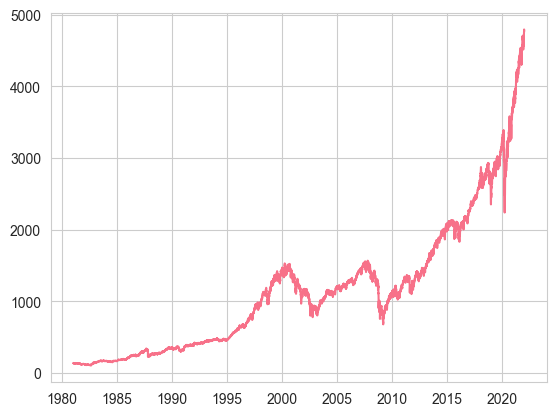

In [11]:
plt.plot(spy.index, spy["Close"])

In [12]:
print(comparison.to_string(index = False))

                    Index       Lumpsum         DCA
           Total invested    $34,500.00  $34,500.00
              Final value $1,206,052.67 $331,366.85
     Investment Gain/Loss $1,171,552.67 $296,866.85
        Investment Return      3395.80%     860.48%
Annulized Return (approx)        84.90%      21.51%


### Lump Sum Investment

The primary advantage of the Lump Sum strategy is the potential for maximized returns.
By investment a large amount of capital at once, the entire sum is immediately exposed to the market's growth.
In a sustained bull market, this can lead to significantly higher returns compared to a DCA approach, which holds a portion of the investment in cash for later periods.

However, the major disadvantage of Lump Sum is its high exposure to timing risk and volatility.
If the market experiences a significant downturn shortly after the investment is made, the portfolio can suffer substantial immediate losses.
This requires a strong risk tolerance from the investor and can lead to emotional, panic-driven decisions like selling at a loss.
Its performance is heavily reliant on entering the market at an advantageous time.

### Dollar-Cost Averaging

The key advantage of DCA is its ability to mitigate risk and reduce the impact of market volatiliy.
By investing fixed amounts periodically, the strategy automatically buys more shares when prices are low and fewer when prices are high.
This results in a lower average cost per share over time.

The main disadvantage of DCA is the opportunity cost in a rising market.
Because a portion of the capital remains uninvested until later intervals, the strategy can underperforma Lump Sum investment if the market trends consistently upward.
It sacrifices maximum potential gains for the sake of reducing risk and volatility.

### Influence of Market Conditions

1. In a Bull Market (Rising):
    - Lump Sum strategy will typically outperform DCA.
2. In a Bear or Volatile Market (Falling or Fluctuating):
    - DCA is generally more resilient strategy.

### Based on our Analysis

The market exhibited a clear upward trend between 1981 to 2021. 
Consequently, as anticipated, the Lump Sum strategy significantly outperformed the the Dollar-Cost Averaging (DCA) approach. 

The total return of the Lump Sum was approximately 3395%, compared to about 860% for the DCA strategy.
This means the Lump Sum strategy generated returns roughly 4 times greater than those achieved through DCA.
